In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from statsmodels.graphics.tsaplots import plot_acf

print(os.getcwd())

/home/charlie/Documents/Uni/Exeter - Data Science/MTHM604_Tackling_Sustainability_Challenges/MTHM604_week_12/MTHM604_week_1/code


### Import data

In [19]:
dataDir = "../data"
df = pd.read_csv(f"{dataDir}/cleanData/indoorAq/ts_0011_sid6322070.csv")
                 #Weekend trends #ts_0109_sid6322115.csv")
                 #weekday trend #ts_0118_sid6322122.csv")
                 
                 #ts_0007_sid6321576.csv")
                 
                 #ts_0111_sid6322117.csv")


In [20]:
df2 = df.drop(columns = ["Unnamed: 0", "sid", "uprns", "sensType"])
df2['datetime'] = pd.to_datetime(df['datetime'])
df2.head()

,datetime,PM2_5
0,2018-01-01 00:01:00,24.0
1,2018-01-01 00:07:00,24.0
2,2018-01-01 00:12:00,15.0
3,2018-01-01 00:17:00,17.0
4,2018-01-01 00:27:00,13.0


In [21]:
# Add day and month name
df2['dayname'] = df2['datetime'].apply(lambda x: x.dayofweek)
df2['month'] = df2['datetime'].apply(lambda x: x.month)
df2['dayofyear'] = df2['datetime'].apply(lambda x: x.dayofyear)


In [22]:
df.isnull().values.any()

False

In [23]:
# Calulate overall mean
y_mean = df2['PM2_5'].mean()
df2['y_norm'] = df2['PM2_5']-y_mean


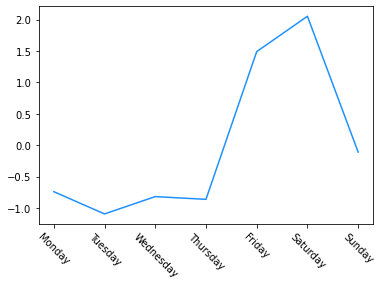

In [24]:
# Plot weekday trend
days_dict = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
            }
df_day = df2.groupby("dayname", as_index = False).mean()
df_day = df_day.sort_values(by = ['dayname'], axis = 0, ascending = True)
df_day['dayname2'] = df_day['dayname'].apply(lambda x: days_dict[x])
plt.plot(df_day['dayname2'],df_day['y_norm'], color = 'dodgerblue')
plt.tick_params(axis='x', labelrotation = -45)

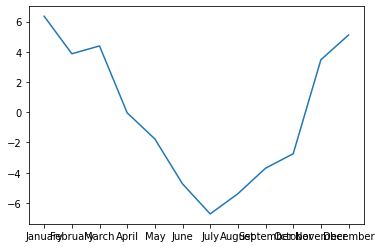

In [25]:
month_dict = {
    1:"January",
    2:"February",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"
}

#Plot monthly trend
df_month = df2.groupby("month", as_index = False).mean()
df_month = df_month.sort_values(['month'],axis = 0, ascending = True)
df_month['month2'] = df_month['month'].apply(lambda x: month_dict[x])
plt.plot(df_month['month2'],df_month['y_norm'])


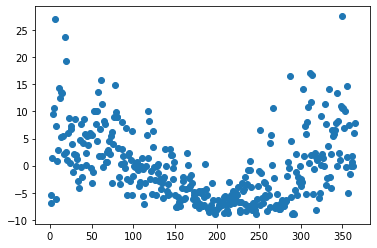

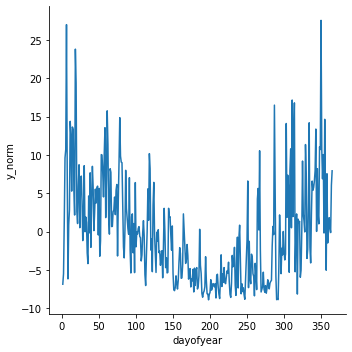

In [26]:
#Plot monthly trend
df3 = df2.groupby("dayofyear").mean()
df3 = df3.sort_index(axis = 0, ascending = True)
plt.scatter(df3.index,df3['y_norm'])
import seaborn as sns
sns.relplot(
    data=df3, x="dayofyear", y="y_norm", kind="line"
)

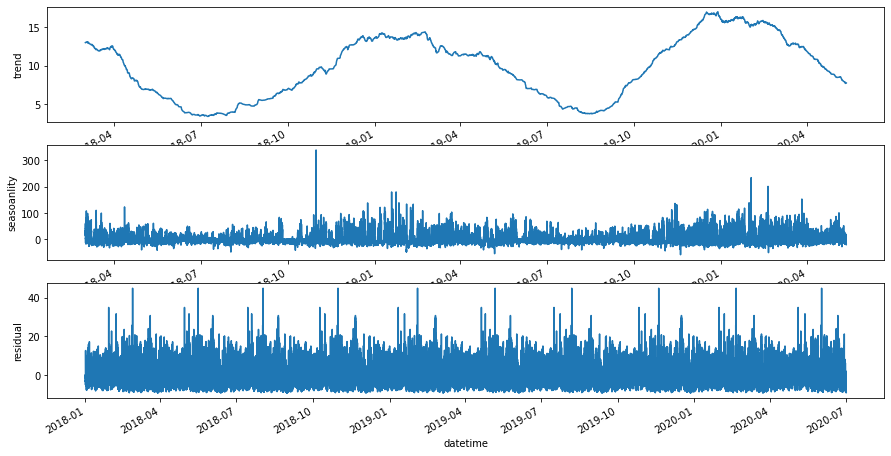

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_trends = df2[['datetime', 'PM2_5']].set_index('datetime')
res = seasonal_decompose(df_trends, model = "additive",period = 36000)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

## Auto correlation and Partial corrlation plots

/home/charlie/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


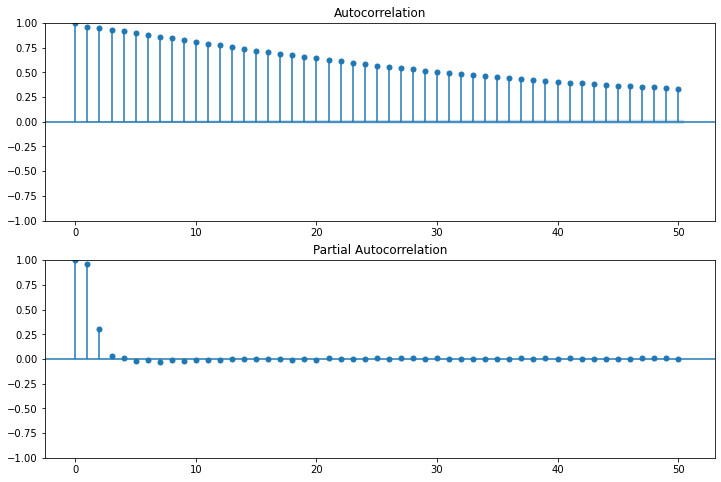

In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['PM2_5'], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['PM2_5'], lags=50, ax=ax2)
plt.show()

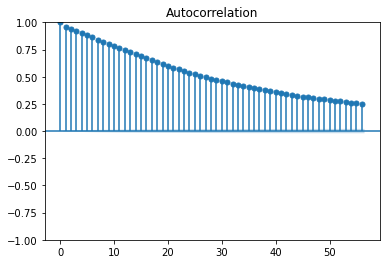

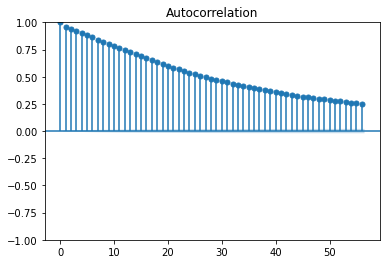

In [29]:
plot_acf(res.seasonal)

In [30]:
df_resampled = df_trends.resample('H').mean()
df_resampled = df_resampled.fillna(0)

/home/charlie/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


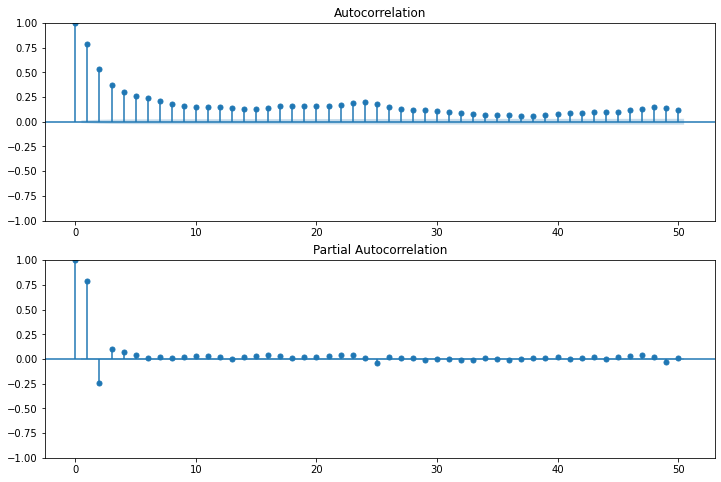

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_resampled['PM2_5'], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_resampled['PM2_5'], lags=50, ax=ax2)
plt.show()

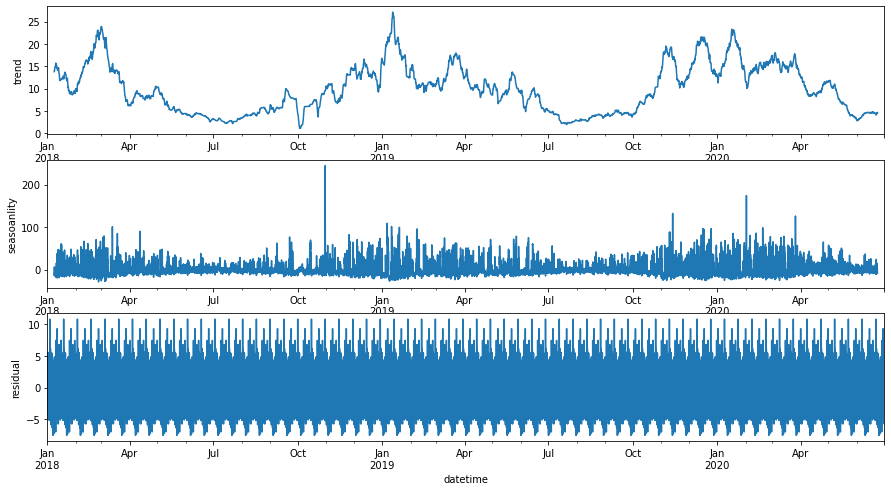

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_resampled, model = "additive",period = 360)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()#

In [33]:
import altair as alt

df_alt = df_resampled.reset_index()
df_alt = df_alt.rename(columns = {'datetime':'ds',
                                 'PM2_5':'y'})
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(df_alt).mark_line().encode(
    alt.X('ds:T'),
    alt.Y('y:Q',
         scale = alt.Scale(domain = (-50, 300)))
)

alt.Chart(...)

## Import weather data

In [123]:
weather_2018 = pd.read_csv("../data/rawData/2018_hourly_weather.csv")
weather_2019 = pd.read_csv("../data/rawData/2019_hourly_weather.csv")
weather_2020 = pd.read_csv("../data/rawData/2020_hourly_weather.csv")

In [124]:
df_weather = weather_2018.append(weather_2019, ignore_index = True)

In [125]:
df_weather = df_weather.append(weather_2020, ignore_index = True)

In [126]:
df_weather['ds'] = pd.to_datetime(df_weather['ds'])

### Join weather data to air quality data

In [127]:
df_joined = df_alt.merge(df_weather, how = 'inner', on = 'ds')

In [128]:
df_joined = df_joined[~df_joined['air_temperature'].isnull()]
df_joined.to_csv("../data/cleanData/df_analysis.csv")

## Plotting Air Temp and PM2_5

In [4]:
df_joined = pd.read_csv("../data/cleanData/df_analysis.csv")

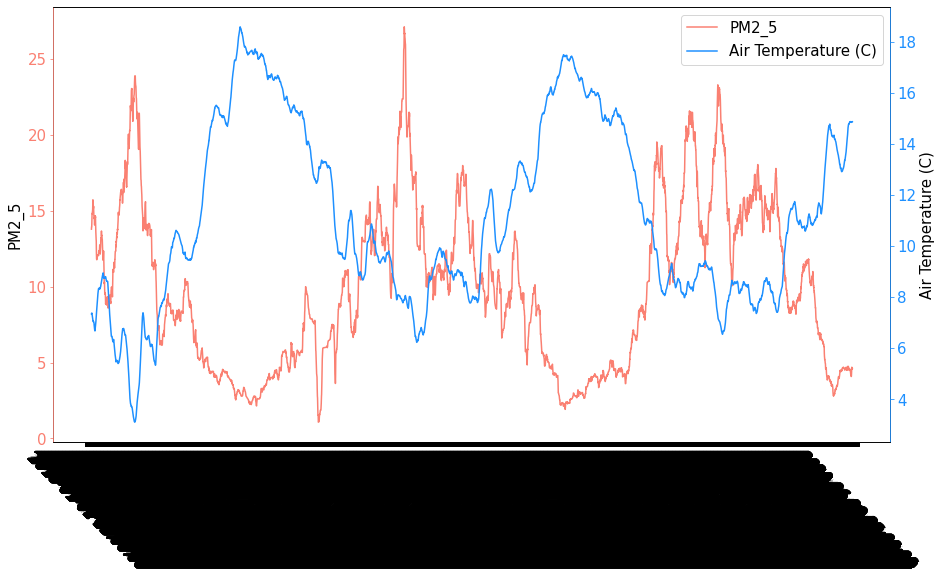

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
res_pm2_5 = seasonal_decompose(df_joined[['ds','y']].set_index('ds'), model = "additive",period = 360)
res_air_temp = seasonal_decompose(df_joined[['ds','air_temperature']].set_index('ds'), model = "additive",period = 360)

fig, ax = plt.subplots(figsize = (15, 8))

line1, = ax.plot(res_pm2_5.trend,label = "PM2_5", color = 'salmon')
ax.set_ylabel("PM2_5")
ax.tick_params(axis='y', colors='salmon')

ax2 = ax.twinx()

line2, = ax2.plot(res_air_temp.trend, label = "Air Temperature (C)", color = 'dodgerblue')
ax2.set_ylabel("Air Temperature (C)")
ax2.tick_params(axis='y', colors='dodgerblue')
ax2.spines['right'].set_color('dodgerblue')
ax2.spines['left'].set_color('salmon')
plt.legend(handles = [line1, line2])
ax.tick_params(axis='x', labelrotation = -45)
plt.rc('font', size = 15)

plt.show()

fig.savefig("plot.svg", dpi = 500)

## Testing for stationarity

In [42]:
from statsmodels.tsa.stattools import adfuller
adfuller_test = adfuller(df_joined['y'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -13.67037686512565
p-value: 1.4635683248181291e-25


In [43]:
from statsmodels.tsa.stattools import adfuller
adfuller_test = adfuller(df_joined['air_temperature'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -4.964093339304612
p-value: 2.6126062181350452e-05


p values suggest both variables are satationary so do not need to difference

## Getting best VAR model
https://towardsdatascience.com/multivariate-time-series-forecasting-456ace675971

In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

df_var = df_joined.copy()
df_var.index = pd.DatetimeIndex(df_var.ds).to_period('H')
df_var = df_var.drop('ds', axis = 1)

In [45]:
size = int(len(df_joined) * 0.8)
train = df_var[['y', 'air_temperature']].iloc[:size, :]
test = df_var[['y', 'air_temperature']].iloc[size:, :]           

In [46]:
forecasting_model = VAR(train)

results_aic = []
for p in range(1, 10):
    results = forecasting_model.fit(p)
    results_aic.append(results.aic)

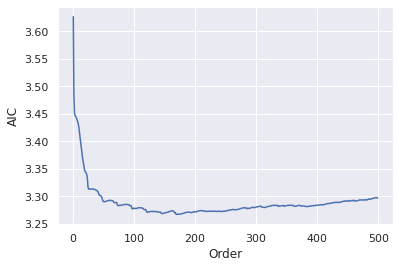

In [47]:
import seaborn as sns
sns.set()
plt.plot(list(np.arange(1,500,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [48]:
results_aic.index(min(results_aic))

171

In [49]:
results = forecasting_model.fit(171)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 12, May, 2022
Time:                     15:27:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.57455
Nobs:                     17337.0    HQIC:                   3.36864
Log likelihood:          -76838.4    FPE:                    26.2453
AIC:                      3.26748    Det(Omega_mle):         25.2368
--------------------------------------------------------------------
Results for equation y
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        3.055460         0.442998            6.897           0.000
L1.y                         1.035545         0.007669          135.023           0.000
L1.air_temperature          -0.42582

In [50]:
lagged_values = train.values[-171:]

forecast = pd.DataFrame(results.forecast(y = lagged_values, steps = 4378),
                       index = test.index, columns = ['y', 'air_temp'])

In [51]:
forecast

,y,air_temp
ds,,
2019-12-31 13:00,6.718968,9.239318
2019-12-31 14:00,9.198441,9.381703
2019-12-31 15:00,10.983885,9.429763
2019-12-31 16:00,13.680769,9.345526
2019-12-31 17:00,19.923911,9.250215
...,...,...
2020-06-30 19:00,9.179593,11.678708
2020-06-30 20:00,9.179920,11.678087
2020-06-30 21:00,9.179741,11.677106


## Time series forecasting
https://medium.com/analytics-vidhya/time-series-forecasting-a-complete-guide-d963142da33f

### Import libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [53]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [54]:
import sklearn
from sklearn.metrics import mean_squared_error

In [55]:
df = df_joined
df.shape

(21886, 8)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21886 entries, 0 to 21886
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ds               21886 non-null  datetime64[ns]
 1   y                21886 non-null  float64       
 2   wind_direction   21870 non-null  float64       
 3   wind_speed       21870 non-null  float64       
 4   msl_pressure     21884 non-null  float64       
 5   air_temperature  21886 non-null  float64       
 6   rltv_hum         21886 non-null  float64       
 7   stn_pres         21884 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.5 MB


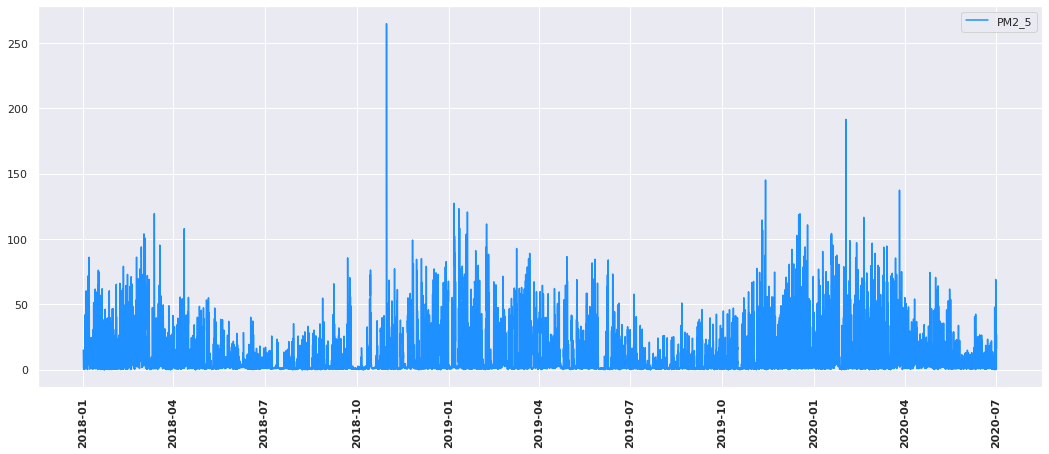

In [57]:
df_pm25 = df[['ds', 'y']].set_index('ds').asfreq('H')

plt.figure(figsize=(18,7))
plt.plot(df_pm25, label='PM2_5', color = 'dodgerblue')
plt.legend(loc='best')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

In [58]:
from pylab import rcParams
import statsmodels.api as sm

df_sd = df[['ds', 'y']].copy()
df_sd['ds'] = pd.to_datetime(df_sd['ds'])
df_sd = df_sd.set_index('ds')
df_sd = df_sd.resample('H').mean()
df_sd = df_sd.fillna(0)

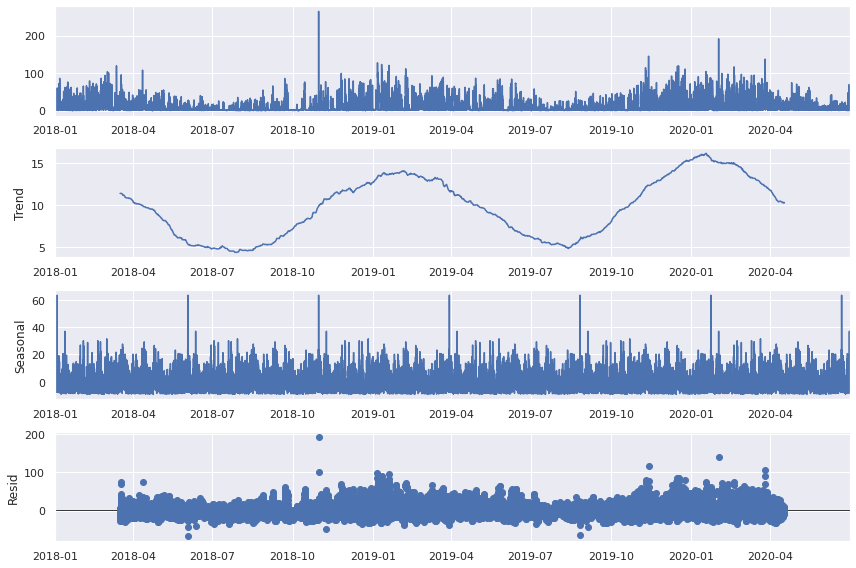

In [59]:
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df_sd, model='additive', period = 3600) # additive seasonal index
fig = decomposition.plot()
plt.show()

## Building and avaluating time series models

In [60]:
train_len = int(len(df_sd)*0.8)
train = df_sd[0 : train_len]
test = df_sd[train_len : ]

### Simple time series methods

#### Naive method

In [61]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['y'][train_len-1]

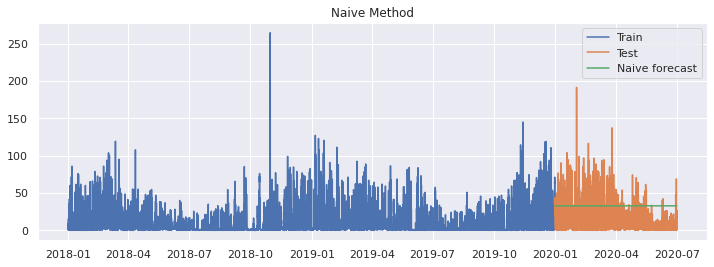

In [62]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [63]:
# Calculate RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['y'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_naive['naive_forecast'])/test['y'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,27.36,inf


#### Simple average method

In [64]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['y'].mean()

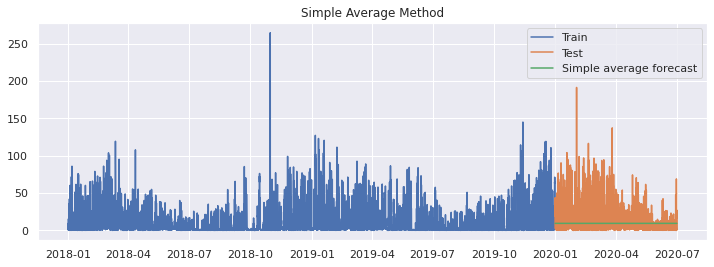

In [65]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [66]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['y'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_avg['avg_forecast'])/test['y'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,27.36,inf
0,Simple average method,17.07,inf


#### Simple moving average method

In [67]:
y_hat_sma = df_sd.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df_sd['y'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

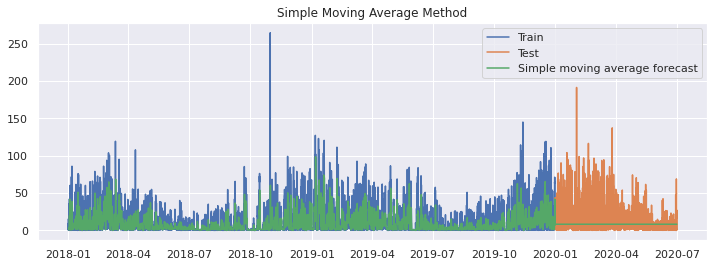

In [68]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [69]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['y'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_sma['sma_forecast'][train_len:])/test['y'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,27.36,inf
0,Simple average method,17.07,inf
0,Simple moving average forecast,17.25,inf


### Exponential Smoothing Techniques

#### Simple exponential smoothing

In [70]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['y'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

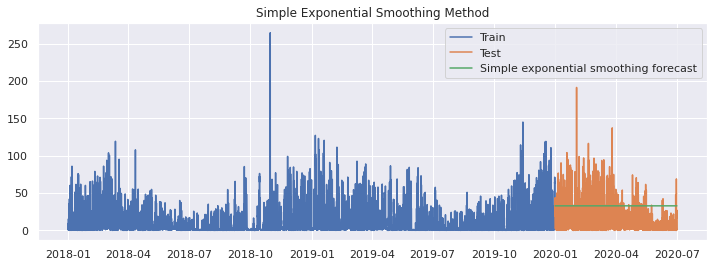

In [71]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [72]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['y'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_ses['ses_forecast'])/test['y'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,27.36,inf
0,Simple average method,17.07,inf
0,Simple moving average forecast,17.25,inf
0,Simple exponential smoothing forecast,27.36,inf


#### Holt's method with trend

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['y']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.995, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 10.0548285048285, 'initial_trend': -1.1912738776375136, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


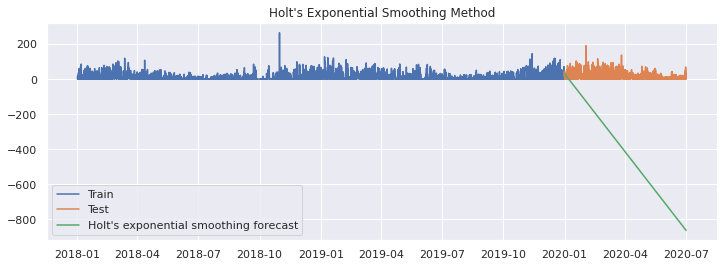

In [74]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [75]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['y'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_holt['holt_forecast'])/test['y'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,27.36,inf
0,Simple average method,17.07,inf
0,Simple moving average forecast,17.25,inf
0,Simple exponential smoothing forecast,27.36,inf
0,Holt's exponential smoothing method,496.51,inf


#### Holt Winters' additive method with trend and seasonality

In [76]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['y']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9919048583154397, 'smoothing_trend': 0.00010199049504983151, 'smoothing_seasonal': 0.008094086638696998, 'damping_trend': nan, 'initial_level': 2.7170072462330053, 'initial_trend': -0.009216714464674425, 'initial_seasons': array([ 0.13249741,  0.31302165,  0.61360792, -0.98490546, -2.23661377,
        0.68510782, -0.34449111, -0.51352509, -0.99593361,  0.925631  ,
        1.60788933,  0.85795876]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


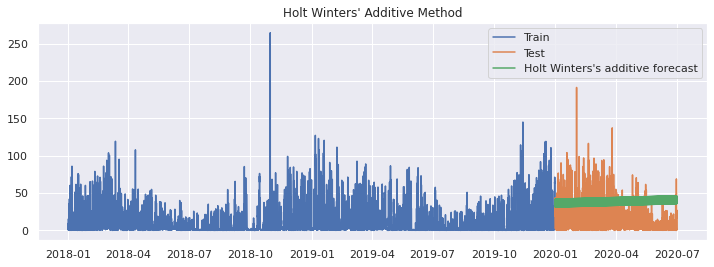

In [77]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [78]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['y'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_hwa['hw_forecast'])/test['y'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,27.36,inf
0,Simple average method,17.07,inf
0,Simple moving average forecast,17.25,inf
0,Simple exponential smoothing forecast,27.36,inf
0,Holt's exponential smoothing method,496.51,inf
0,Holt Winters' additive method,29.79,inf


### Auto regressive methods

In [79]:
# Check for sationarity using Augmented Dickey-Fuller (ADF) test

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_sd['y'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -13.670183
Critical Values @ 0.05: -2.86
p-value: 0.000000


Inference : p-value is less than 0.05. This means that the series is stationary.

In [80]:
# Check for sationarity using Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_sd['y'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])


KPSS Statistic: 0.789114
Critical Values @ 0.05: 0.46
p-value: 0.010000


Inference : p-value is greater than 0.05. This means that the series is not stationary.

### Auto regression method (AR)

In [115]:
train_len = int(len(df_sd)-10)
train = df_sd[0 : train_len]
test = df_sd[train_len : ]

In [116]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1, 1, 10)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      0.953794
ma.L1     -0.965264
ma.L2     -0.324234
ma.L3      0.039828
ma.L4      0.121030
ma.L5      0.102209
ma.L6      0.015431
ma.L7     -0.012157
ma.L8     -0.001489
ma.L9      0.003405
ma.L10     0.022237
sigma2    89.224047
dtype: float64


In [117]:
# Recover original time series

y_hat_ar = df_sd.copy()
y_hat_ar['ar_forecast'] = model_fit.predict(test.index.min(), test.index.max())


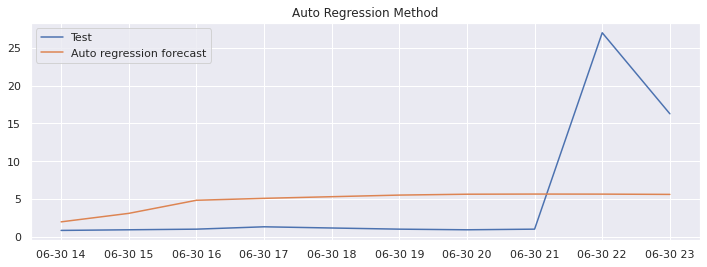

In [118]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
#plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [119]:
y_hat_ar

,y,ar_forecast
ds,,
2018-01-01 00:00:00,15.000000,NaN
2018-01-01 01:00:00,7.272727,NaN
2018-01-01 02:00:00,4.000000,NaN
2018-01-01 03:00:00,2.428571,NaN
2018-01-01 04:00:00,1.846154,NaN
...,...,...
2020-06-30 19:00:00,1.000000,5.509932
2020-06-30 20:00:00,0.916667,5.625243
2020-06-30 21:00:00,1.000000,5.645015


### Seasonal auto regressive integrated moving average (SARIMA)

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83323D+00    |proj g|=  6.99053D-02


 This problem is unconstrained.



At iterate    5    f=  3.73353D+00    |proj g|=  3.30325D-02

At iterate   10    f=  3.65950D+00    |proj g|=  4.80380D-03

At iterate   15    f=  3.65866D+00    |proj g|=  1.01524D-02

At iterate   20    f=  3.65686D+00    |proj g|=  2.55311D-03

At iterate   25    f=  3.65677D+00    |proj g|=  1.57026D-04

At iterate   30    f=  3.65676D+00    |proj g|=  4.04152D-04

At iterate   35    f=  3.65675D+00    |proj g|=  1.43286D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     41      1     0     0   7.438D-06   3.657D+00
  F =   3.6567511301223621     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

In [121]:
# Recover original time series forecast

y_hat_sarima = df_sd.copy()
y_hat_sarima['sarima_forecast'] = model_fit.predict(test.index.min(), test.index.max())

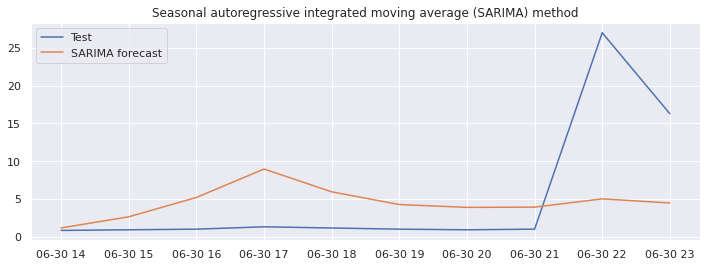

In [122]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
#plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()